In [10]:
# Python libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_svmlight_file
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [3]:
# Load Dataset
X, y = load_svmlight_file('diabetes.txt')
X_dense = X.toarray()

# Create a pandas dataframe
df = pd.DataFrame(X_dense)
df['Outcome'] = y

df.columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
    'Diabetes Pedigree', 'Age', 'Outcome'
]
display(df.head())
display(df.info())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0,-1.0
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0,1.0
2,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0,-1.0
3,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0,1.0
4,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0,-1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    float64
 1   Glucose            768 non-null    float64
 2   BloodPressure      768 non-null    float64
 3   SkinThickness      768 non-null    float64
 4   Insulin            768 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes Pedigree  768 non-null    float64
 7   Age                768 non-null    float64
 8   Outcome            768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


None

## EDA

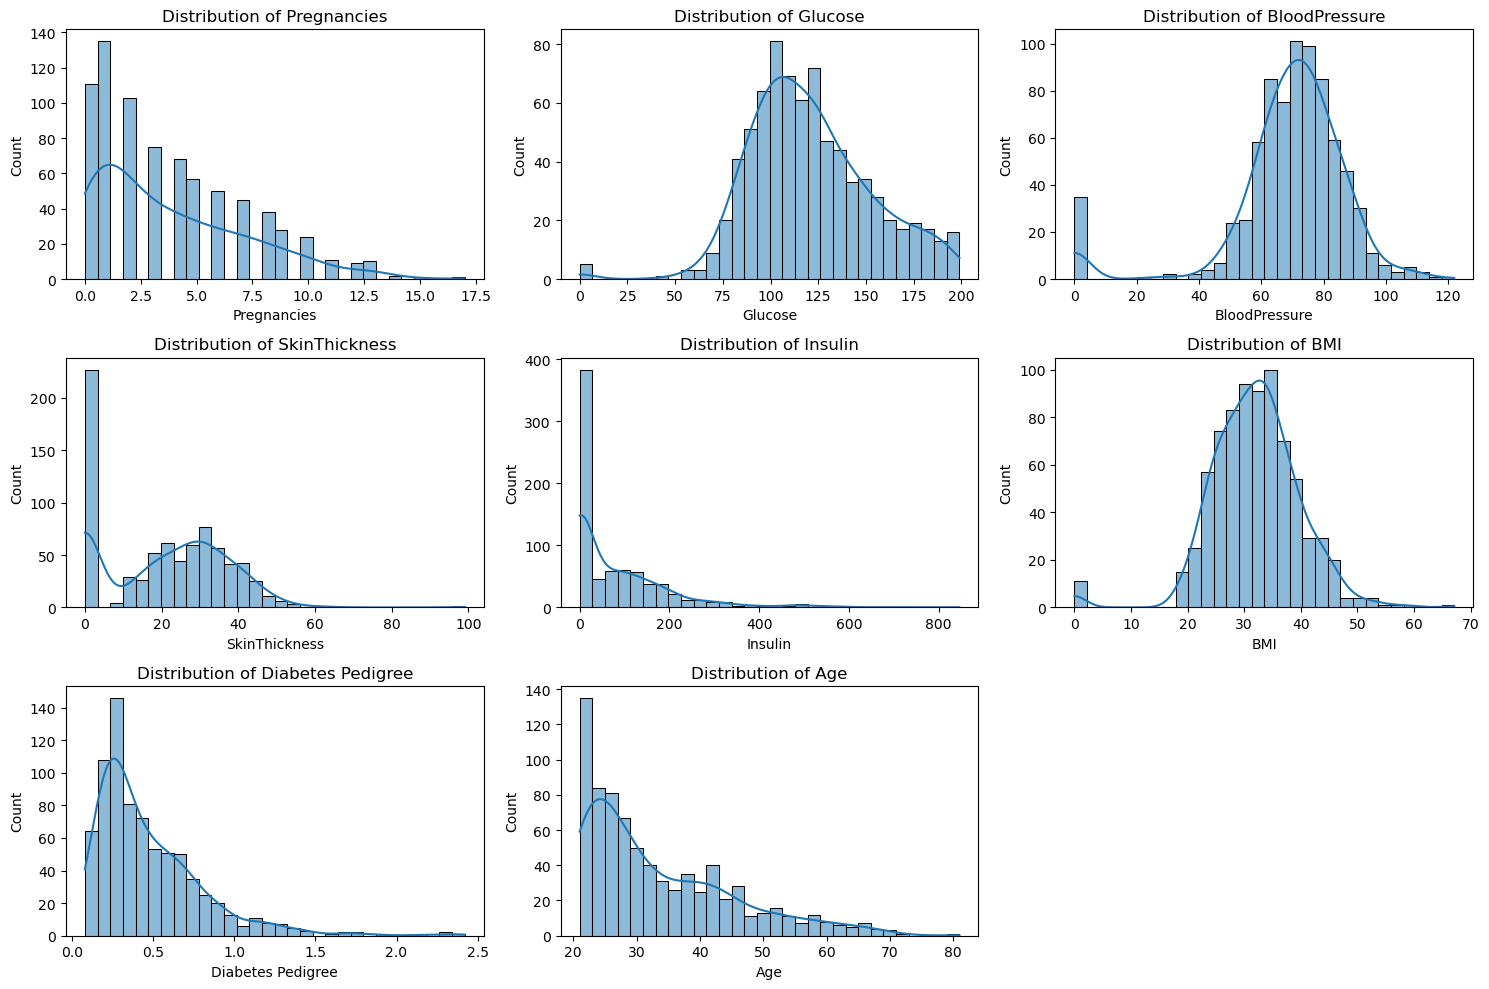

In [4]:
# Distribution
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

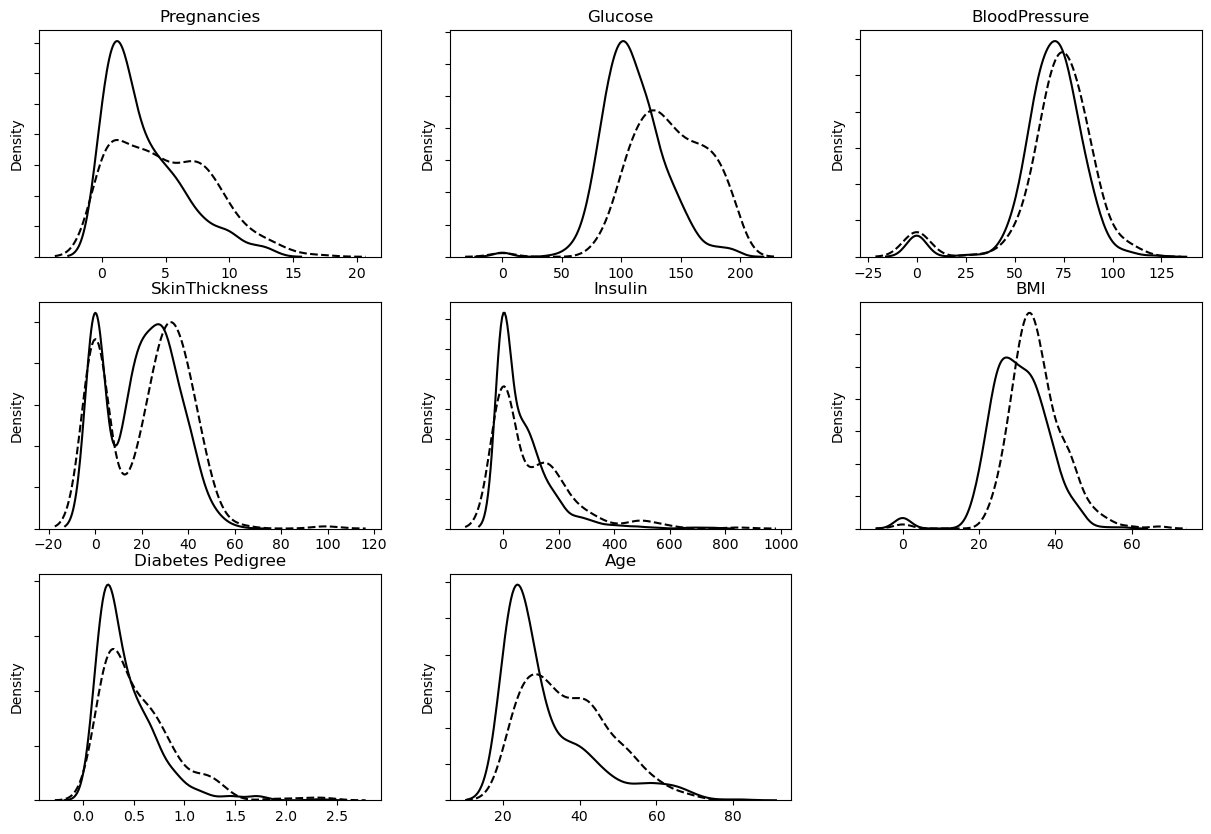

In [5]:
plt.subplots(3,3,figsize=(15,10))

# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    
    # Solid line is non-Diabetics
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, kde_kws={'linestyle':'-', 'color':'black', 'label':"No Diabetes"})
    # Dash line is Diabetics
    sns.distplot(df.loc[df.Outcome == -1][col], hist=False, axlabel= False, kde_kws={'linestyle':'--', 'color':'black', 'label':"Diabetes"})
    ax.set_title(col)
    
plt.subplot(3,3,9).set_visible(False)

plt.show()

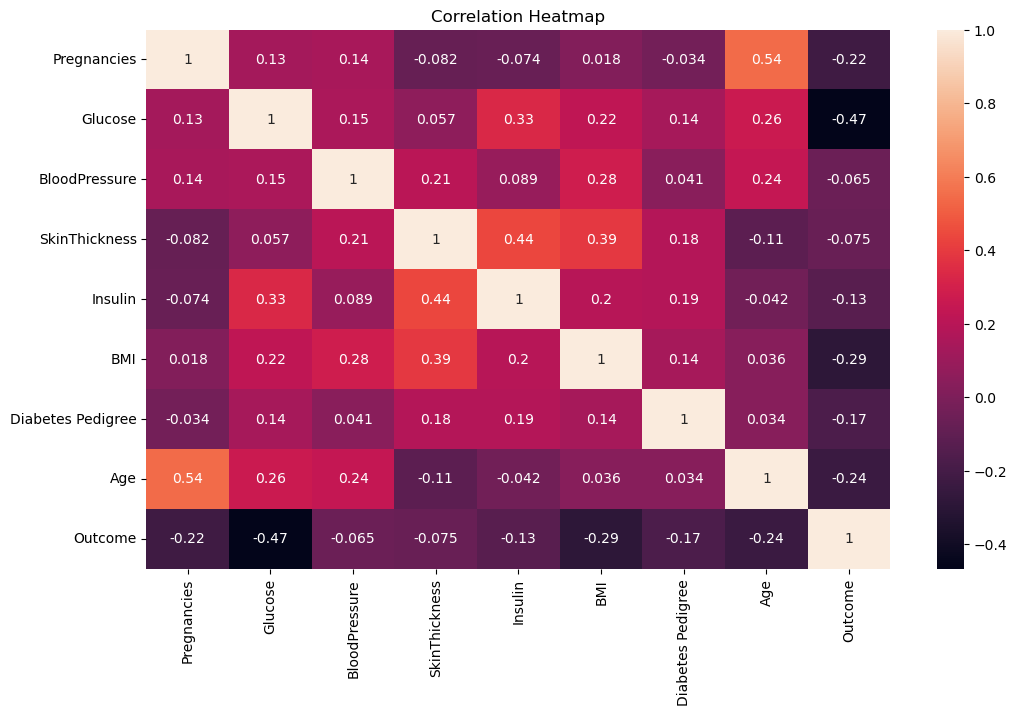

In [6]:
# correaltion of features
corr = df.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

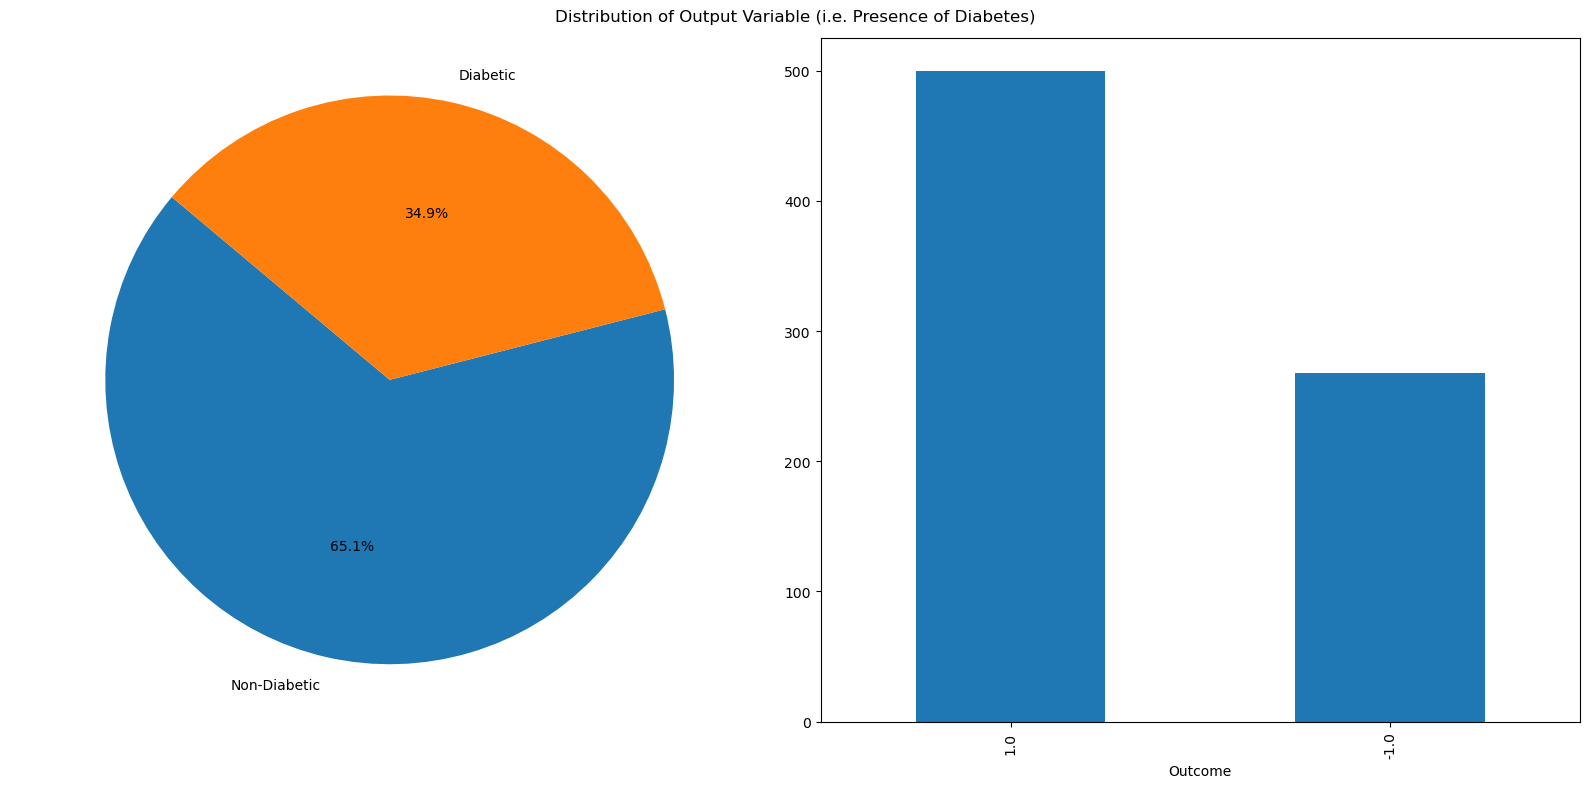

In [7]:
counts_output = df['Outcome'].value_counts()

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.pie(counts_output, labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')


plt.subplot(1, 2, 2)
counts_output.plot(kind='bar')

plt.suptitle('Distribution of Output Variable (i.e. Presence of Diabetes)')
plt.tight_layout()
plt.show()

## Data Splitting & Standardization

In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the data
print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (614, 8)
Test set shape: (154, 8)


## Modelling

### Single Layer Percepton

In [13]:
# Initialize the Perceptron model
slp = Perceptron(max_iter=1000, eta0=0.01, random_state=42)

# Train the model
slp.fit(X_train_scaled, y_train)

# Predictions
y_pred = perceptron.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.73
              precision    recall  f1-score   support

        -1.0       0.60      0.69      0.64        55
         1.0       0.81      0.75      0.78        99

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



F1 Score :  0.7789473684210526
Precision Score :  0.8131868131868132
Recall Score :  0.7474747474747475


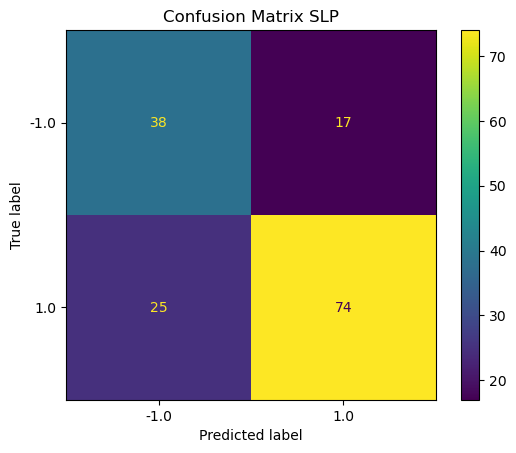

In [17]:
# f1_score, precision score and recall score
f1_score_slp = f1_score(y_test,y_pred)

precision_score_slp = precision_score(y_test,y_pred)
recall_score_slp = recall_score(y_test,y_pred)

print("F1 Score : ", f1_score_slp)
print("Precision Score : ", precision_score_slp)
print("Recall Score : ", recall_score_slp)

# confusion matrix
cm_slp = confusion_matrix(y_test,y_pred,labels = slp.classes_)
disp_conf_slp = ConfusionMatrixDisplay(confusion_matrix = cm_slp, display_labels = slp.classes_)

disp_conf_slp.plot()
plt.title("Confusion Matrix SLP")
plt.show()

### Multilayer Percepton

In [21]:
# Create and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = mlp.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
# Print a classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.73
              precision    recall  f1-score   support

        -1.0       0.61      0.65      0.63        55
         1.0       0.80      0.77      0.78        99

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [22]:
mlp = MLPClassifier(max_iter = 5000)

param_grid_mlp = {
    'hidden_layer_sizes': [(32,), (64,), (32, 32), (64, 64), (32, 64, 32)]
}

grid_search_mlp = GridSearchCV(estimator = mlp, param_grid = param_grid_mlp, cv = 5, n_jobs = -1)
grid_search_mlp.fit(X_train_scaled, y_train)

print("Best hyperparameters : ", grid_search_mlp.best_params_)

Best hyperparameters :  {'hidden_layer_sizes': (32,)}


In [28]:
mlp_best_param = MLPClassifier(hidden_layer_sizes=(32,))
mlp_best_param.fit(X_train_scaled, y_train)

prediction_mlp_test = mlp_best_param.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, prediction_mlp_test)}")

Accuracy: 0.7467532467532467


F1 Score :  0.8
Precision Score :  0.8125
Recall Score :  0.7878787878787878


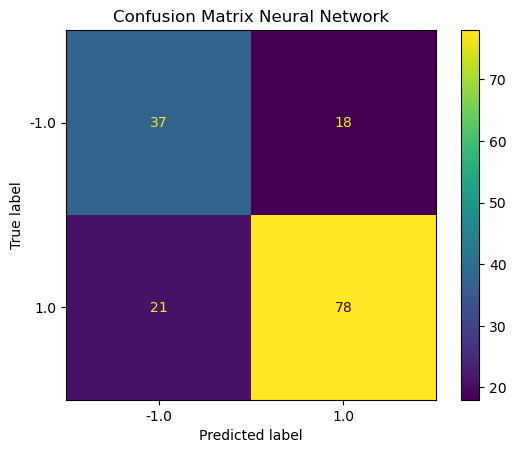

In [29]:
f1_score_mlp = f1_score(y_test, prediction_mlp_test)

precision_score_mlp = precision_score(y_test, prediction_mlp_test)
recall_score_mlp = recall_score(y_test, prediction_mlp_test)

print("F1 Score : ", f1_score_mlp)
print("Precision Score : ", precision_score_mlp)
print("Recall Score : ", recall_score_mlp)


cm_mlp = confusion_matrix(y_test, prediction_mlp_test, labels = mlp_best_param.classes_)
disp_conf_mlp = ConfusionMatrixDisplay(confusion_matrix = cm_mlp, display_labels = mlp_best_param.classes_)

disp_conf_mlp.plot()
plt.title("Confusion Matrix Neural Network")
plt.show()